<a href="https://colab.research.google.com/github/Kasula-Lohith-Kumar/ScalerProjects/blob/main/Yulu_BusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://indigoawards.s3.amazonaws.com/store/cover/5904/image/optimal-11359559776ed50bf8043984ee3757ff.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#07f0ec" size="6">
                    <b>Yulu Business Case</b>
                </font>
                <br>
                <br>
                <br>
                <font color="#7F0542" size="2">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>

##<font color='Brown'>Problem Statement:</font>

*   ***Strategic Expansion***: Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is
essential to tailor their services and strategies accordingly.
*   ***Revenue Recovery:*** Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make
informed adjustments to regain profitability.



<font></font>

##<font color='brown'>Installing and importing the packages</font>

In [ ]:
#Mounting all the files form the google drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installing required packages
!pip install colorama --upgrade

In [ ]:
#importing all the requrired python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ks_1samp
from scipy.stats import ks_2samp
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from colorama import Fore, Back, Style

#considering significance level alpha = 0.05
alpha =0.05

<font>

<font></font>

##<font color='brown'>Performing the basic anlaysis of the data</font>

In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Scaler/BusinessCases/yulu_bc_ds.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Converting the datetime column to datatime object
df['datetime'] = pd.to_datetime(df['datetime'])

#splitting the datetime to date, timestamp, year, month, day
df['date'] = df['datetime'].dt.date
df['timestamp'] = df['datetime'].dt.time
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day_name()


In [ ]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date                  object
timestamp             object
year                   int32
month                 object
day                   object
dtype: object

In [ ]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day']

for i in df.columns:
  if i in categorical_columns:
    df[categorical_columns] = df[categorical_columns].astype('object')

In [ ]:

df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'timestamp', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=10886, step=1)

In [ ]:
df.shape

(10886, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  timestamp   10886 non-null  object        
 14  year        10886 non-null  object        
 15  month       10886 non-null  object        
 16  day         10886 non-

In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
df[df['count']==df['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,2012-09-12,18:00:00,2012,September,Wednesday


In [ ]:
df[df['temp']==df['temp'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
8311,2012-07-07 16:00:00,3,0,0,1,41.0,43.18,19,11.0014,102,192,294,2012-07-07,16:00:00,2012,July,Saturday


In [ ]:
df[df['atemp']==df['atemp'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
8333,2012-07-08 14:00:00,3,0,0,1,39.36,45.455,36,11.0014,77,235,312,2012-07-08,14:00:00,2012,July,Sunday


In [ ]:
df.describe(include='object')

,season,holiday,workingday,weather,date,timestamp,year,month,day
count,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,456,24,2,12,7
top,4,0,1,1,2011-01-01,12:00:00,2012,May,Saturday
freq,2734,10575,7412,7192,24,456,5464,912,1584


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in ['season', 'holiday', 'workingday', 'weather']:
    print(f'Unique values of {i}s are:\n{df[i].unique()}\n')

Unique values of seasons are:
[1 2 3 4]

Unique values of holidays are:
[0 1]

Unique values of workingdays are:
[0 1]

Unique values of weathers are:
[1 2 3 4]



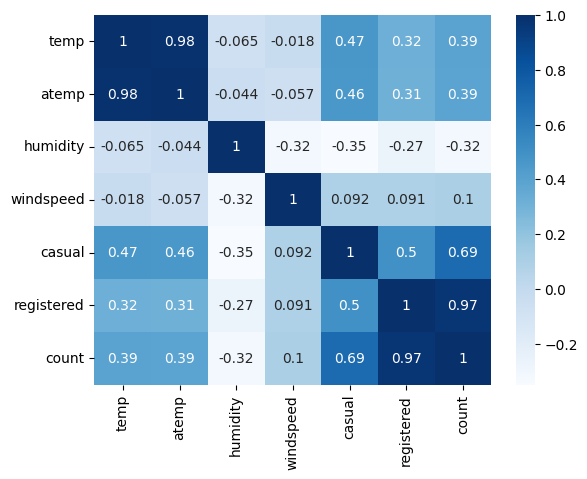

In [ ]:
corr_df = df[['temp','atemp', 'humidity', 'windspeed','casual','registered','count']]

sns.heatmap(corr_df.corr(), annot=True, cmap="Blues")
plt.show()

<font></font>

##<font color='brown'>Univariate analysis</font>

In [ ]:
year_grd_service_count = df[['year','count']].groupby('year')
year_grd_service_count = year_grd_service_count.sum('count')
year_grd_service_count

,count
year,
2011,781979
2012,1303497


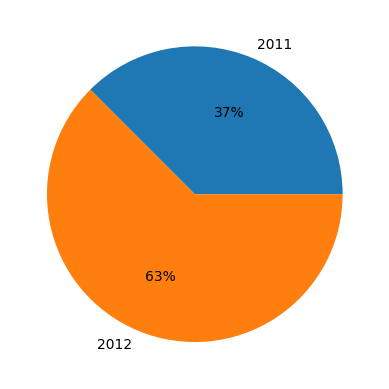

In [ ]:
plt.pie(year_grd_service_count['count'], labels=year_grd_service_count.index, autopct='%0.0f%%')
plt.show()

In [ ]:
seasons_series = df['season'].value_counts()
seasons_series.rename({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True, axis='index')
seasons_series

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

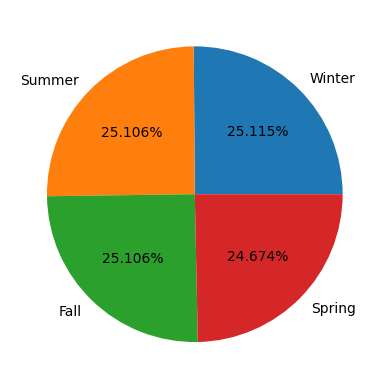

In [ ]:
plt.pie(seasons_series, labels=seasons_series.index, autopct='%0.3f%%')
plt.show()

In [ ]:
holiday_series = df['holiday'].value_counts()
holiday_series.rename({0:'Non-Holiday', 1:'Holiday'}, inplace=True, axis='index')
holiday_series

holiday
Non-Holiday    10575
Holiday          311
Name: count, dtype: int64

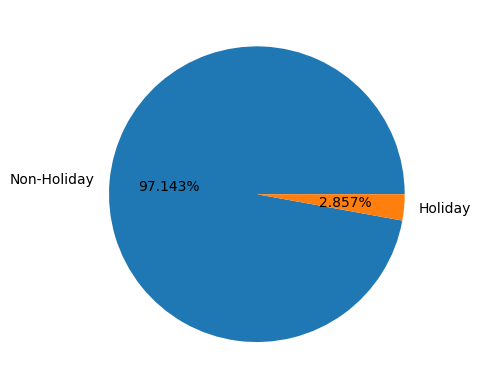

In [ ]:
plt.pie(holiday_series, labels=holiday_series.index, autopct='%0.3f%%')
plt.show()

In [ ]:
workingday_series = df['workingday'].value_counts()
workingday_series.rename({0:'Non-Workingday', 1:'Workingday'}, inplace=True, axis='index')
workingday_series

workingday
Workingday        7412
Non-Workingday    3474
Name: count, dtype: int64

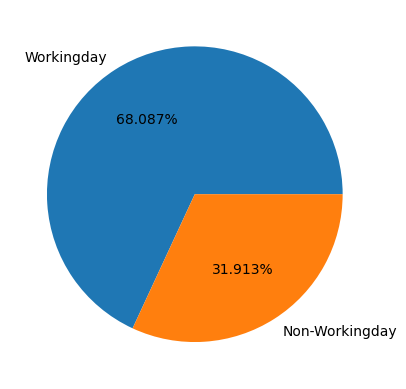

In [ ]:
plt.pie(workingday_series, labels=workingday_series.index, autopct='%0.3f%%')
plt.show()

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,January,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,January,Saturday


In [ ]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [ ]:
weather_series = df['weather'].value_counts()
weather_series.rename({1:'Clear, Few clouds, partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                       3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +Scattered clouds',
                       4:'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'}, axis='index', inplace=True)
weather_series

weather
Clear, Few clouds, partly cloudy                                                          7192
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              2834
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +Scattered clouds     859
Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog                                   1
Name: count, dtype: int64

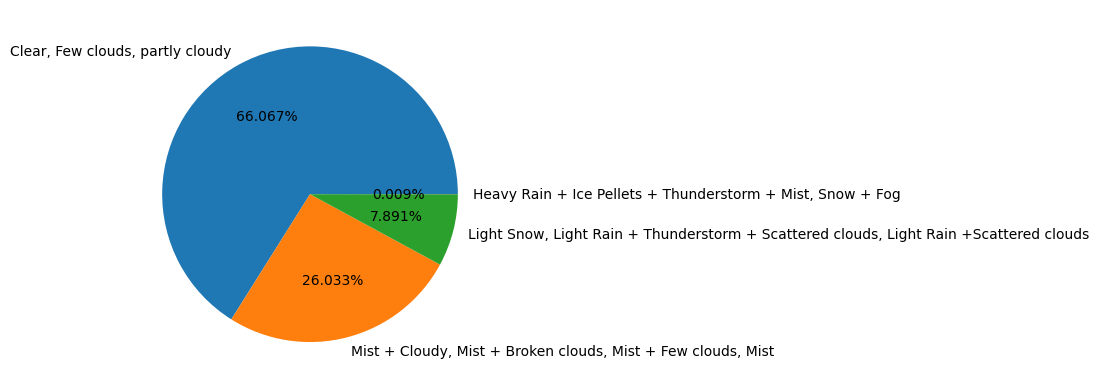

In [ ]:
plt.pie(weather_series, labels=weather_series.index, autopct='%0.3f%%')
plt.show()

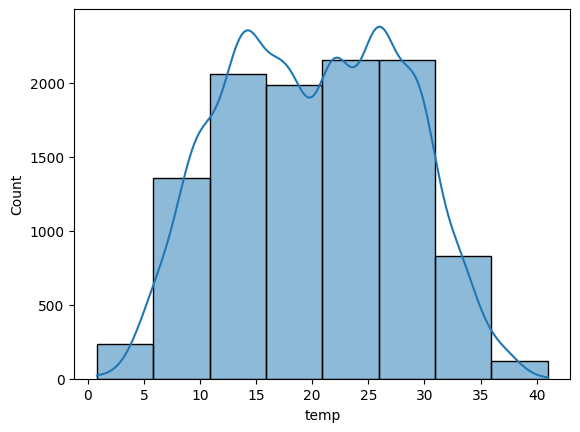

Maximum Temp:41.0
Minimum Temp: 0.82


In [ ]:
sns.histplot(df['temp'], binwidth=5,kde=True)
plt.show()
print(f"Maximum Temp:{df['temp'].max()}")
print(f"Minimum Temp: {df['temp'].min()}")

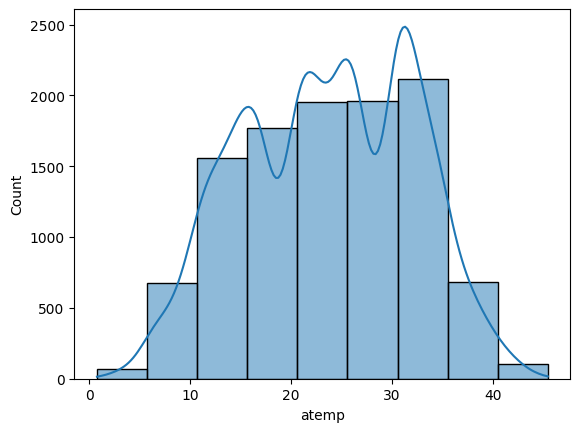

Maximum aTemp:45.455
Minimum aTemp: 0.76


In [ ]:
sns.histplot(df['atemp'], binwidth=5,kde=True)
plt.show()
print(f"Maximum aTemp:{df['atemp'].max()}")
print(f"Minimum aTemp: {df['atemp'].min()}")

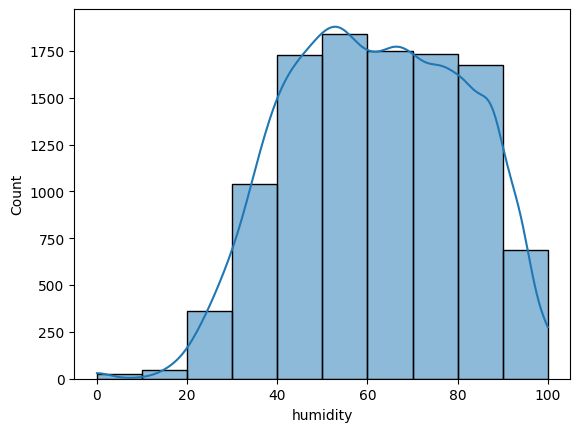

Maximum humidity:100
Minimum humidity: 0


In [ ]:
sns.histplot(df['humidity'], binwidth=10,kde=True)
plt.show()
print(f"Maximum humidity:{df['humidity'].max()}")
print(f"Minimum humidity: {df['humidity'].min()}")

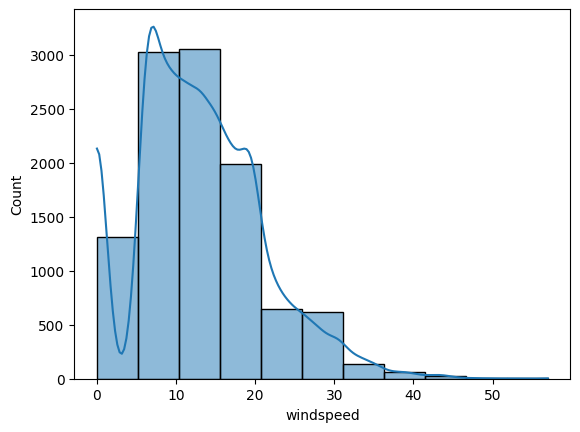

Maximum windspeed:56.9969
Minimum windspeed: 0.0


In [ ]:
sns.histplot(df['windspeed'], binwidth=5,kde=True)
plt.show()
print(f"Maximum windspeed:{df['windspeed'].max()}")
print(f"Minimum windspeed: {df['windspeed'].min()}")

In [ ]:
# 1: spring, 2: summer, 3: fall, 4: winter
season_count = df[['season', 'count']]
season_count.loc[season_count['season']==1, 'season'] = 'spring'
season_count.loc[season_count['season']==2, 'season'] = 'summer'
season_count.loc[season_count['season']==3, 'season'] = 'fall'
season_count.loc[season_count['season']==4, 'season'] = 'winter'
season_count_sum = season_count.groupby('season').sum('count')
season_count_sum.reset_index(inplace=True)
season_count_sum

,season,count
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


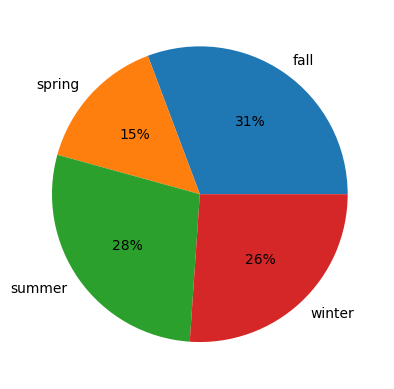

In [ ]:
plt.pie(season_count_sum['count'], labels=season_count_sum['season'],autopct='%0.0f%%')
plt.show()

<font></font>

##<font color='brown'>Bivariate Analysis</font>

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,January,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,January,Saturday


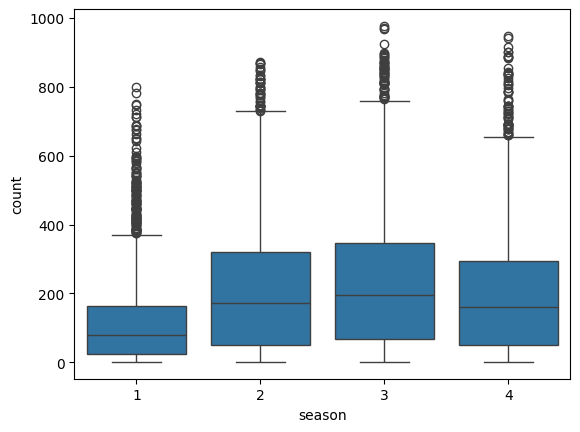

In [ ]:
sns.boxplot(x='season', y='count', data=df)
plt.show()

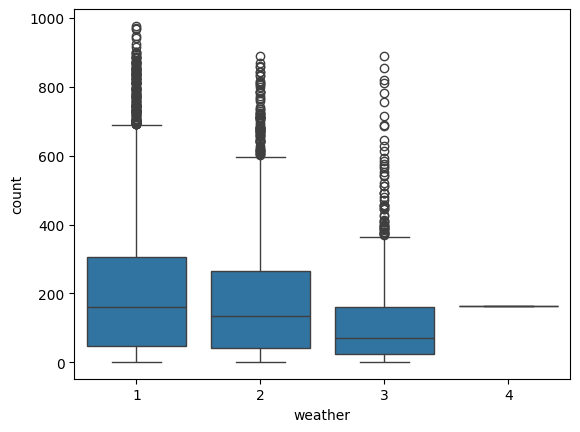

In [ ]:
sns.boxplot(x='weather', y='count', data=df)
plt.show()

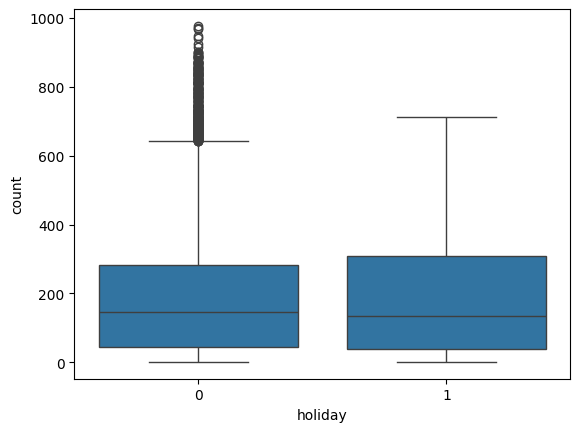

In [ ]:
sns.boxplot(x='holiday', y='count', data=df)
plt.show()

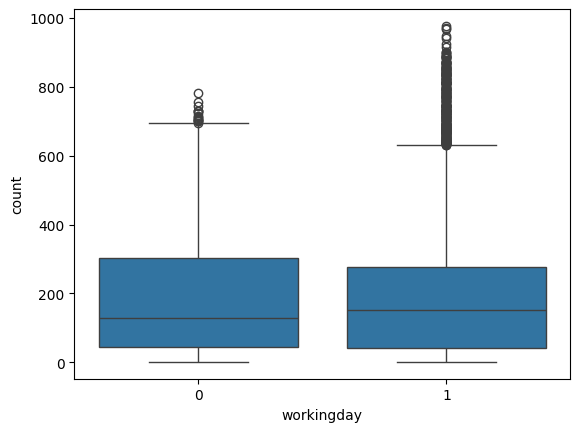

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)
plt.show()

In [ ]:
day_counts = df[['day','count']].groupby('day').sum('count')
day_counts

,count
day,
Friday,302504
Monday,295296
Saturday,311518
Sunday,285546
Thursday,306401
Tuesday,291985
Wednesday,292226


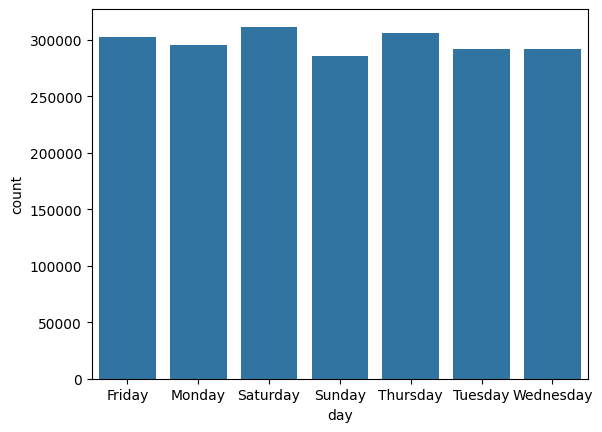

In [ ]:
day_counts.reset_index(inplace=True)
sns.barplot(x='day', y='count', data=day_counts)
plt.show()

In [ ]:
month_counts = df[['month','count']].groupby('month').sum('count')
month_counts.sort_values(by='count',ascending=False, inplace=True)
month_counts

,count
month,
June,220733
July,214617
August,213516
September,212529
October,207434
May,200147
November,176440
April,167402
December,160160


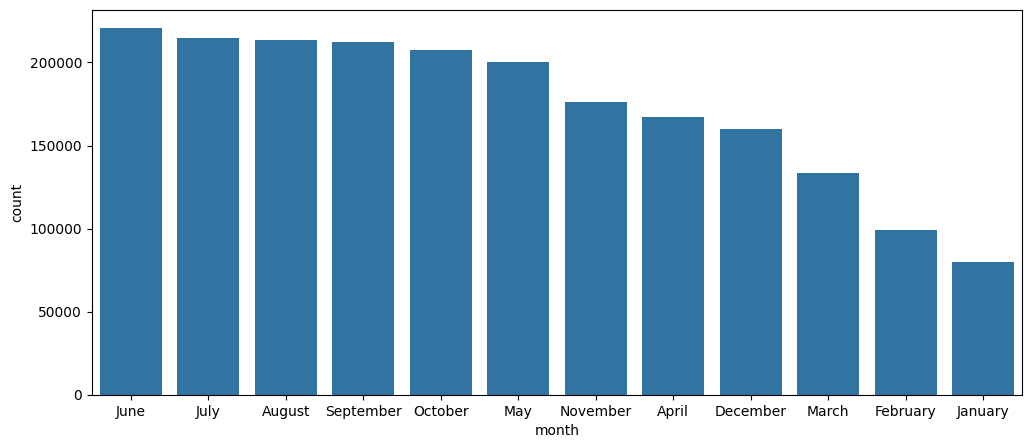

In [ ]:
month_counts.reset_index(inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(x='month', y='count', data=month_counts)
plt.show()

In [ ]:
timestamp_grpd_sum = df[['timestamp','count']].groupby('timestamp').sum('count')
timestamp_grpd_sum.reset_index(inplace=True)
timestamp_grpd_sum.sort_values(by='timestamp', ascending=False,inplace=True)
timestamp_top5 = timestamp_grpd_sum.head(5)
timestamp_top5

,timestamp,count
23,23:00:00,40816
22,22:00:00,60911
21,21:00:00,79057
20,20:00:00,104204
19,19:00:00,143767


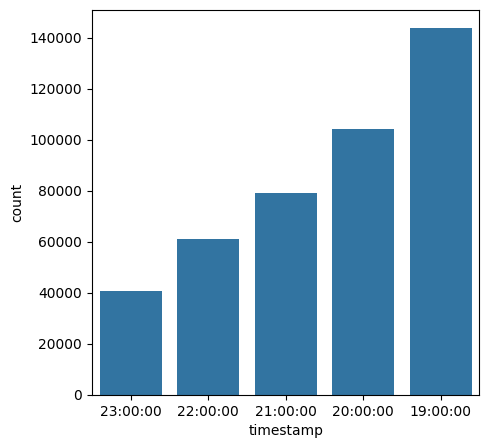

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='timestamp', y='count', data=timestamp_top5)
plt.show()

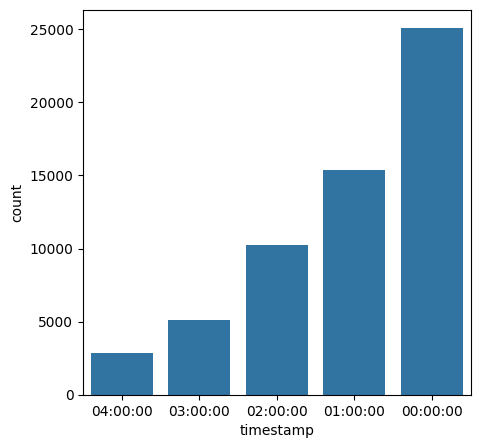

In [ ]:
timestamp_bottom5 = timestamp_grpd_sum.tail(5)
timestamp_bottom5
plt.figure(figsize=(5,5))
sns.barplot(x='timestamp', y='count', data=timestamp_bottom5)
plt.show()

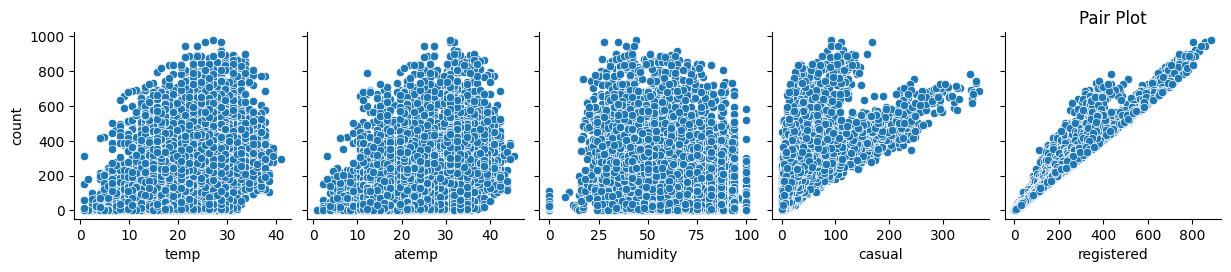

In [ ]:
sns.pairplot(y_vars='count', x_vars=['temp','atemp','humidity','casual','registered'],data=df)
plt.title('Pair Plot')
plt.show()

<font></font>

##<font color='brown'>Season vs Count Hypothesis testing (Anova)</font>


Assumptions of Anova
*   Data should be normally distributed (i.e Gausssian)
*   Data should be independent accross each record
*   Equal variance between the groups

Test Assumptions:

*   H0: No difference in count of yulu commuters w.r.t different seasons
*   Ha: Significant difference in count of yulu commuters w.r.t different seasons





In [ ]:
winter_data_sample  = np.array(season_count[season_count['season']=='winter']['count'])
print('winter_data_sample_size',len(winter_data_sample))
summer_data_sample  = np.array(season_count[season_count['season']=='summer']['count'].to_list())
print('summer_data_sample_size',len(summer_data_sample))
fall_data_sample  = np.array(season_count[season_count['season']=='fall']['count'].to_list())
print('fall_data_sample_size',len(fall_data_sample))
spring_data_sample  = np.array(season_count[season_count['season']=='spring']['count'].to_list())
print('spring_data_sample_size', len(spring_data_sample))

winter_data_sample_size 2734
summer_data_sample_size 2733
fall_data_sample_size 2733
spring_data_sample_size 2686


#####<font color='indigo'>Normality test by using the QQ plot</font>

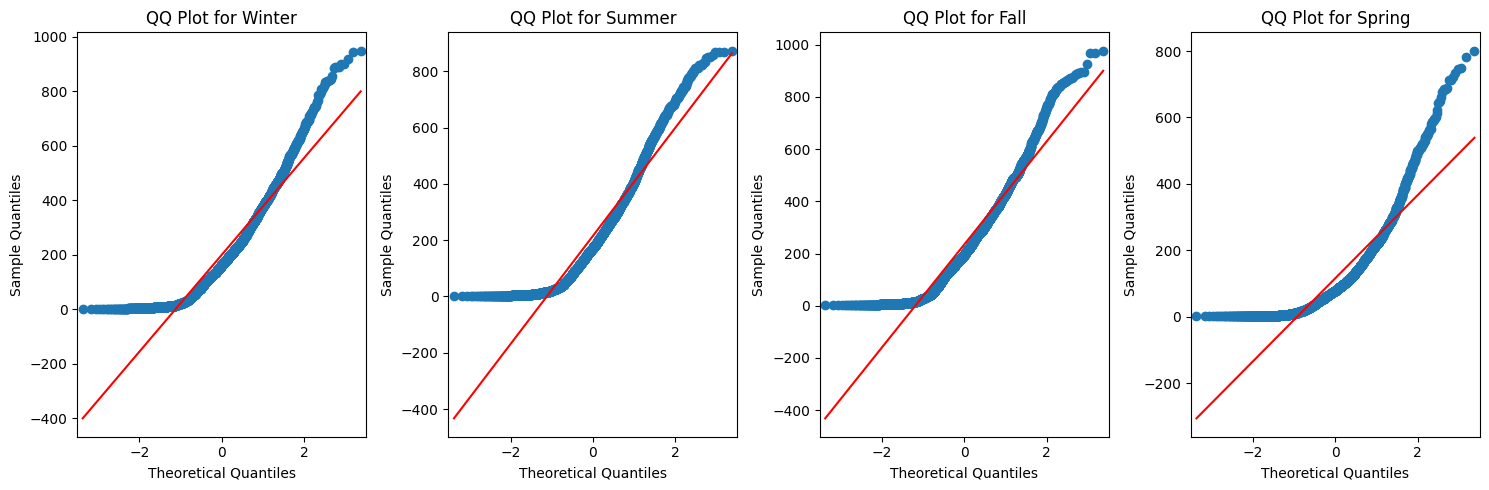

In [ ]:
all_seasons_dict = {
    'Winter': winter_data_sample,
    'Summer': summer_data_sample,
    'Fall': fall_data_sample,
    'Spring': spring_data_sample
}
all_seasons = list(all_seasons_dict.keys())
num_plots = len(all_seasons_dict)
fig, axes = plt.subplots(1,num_plots, figsize=(15,5))
for plot, season in all_seasons_dict.items():
  qqplot(season, line='s', ax=axes[all_seasons.index(plot)])
  axes[all_seasons.index(plot)].set_title(f'QQ Plot for {plot}')
plt.tight_layout()
plt.show()

<font color='#b55418'>Observation:</font> From the above plots it's clear that the data is not normal


#####<font color='indigo'>Normality test by using Statistical test(Shapiro Wilk Test)</font>

In [ ]:
for season, data in all_seasons_dict.items():
  stats, p_value = shapiro(data)
  print(Fore.BLUE + f'{season} Season')
  print(Fore.BLACK + f'\tstats: {np.round(stats,4)}')
  print(f'\tp_value: {np.round(p_value,4)}')
  if p_value < 0.05:
    print(f'\tData is not normally distributed')
  else:
    print(f'\tData is normally distributed')
  print(' ')

Winter Season
	stats: 0.8955
	p_value: 0.0
	Data is not normally distributed
 
Summer Season
	stats: 0.9005
	p_value: 0.0
	Data is not normally distributed
 
Fall Season
	stats: 0.9148
	p_value: 0.0
	Data is not normally distributed
 
Spring Season
	stats: 0.8087
	p_value: 0.0
	Data is not normally distributed
 


<font color='#b55418'>Observation:</font> From the above Statistical test also it's proved that the data is not normally distributed

#####<font color='indigo'>Variance b/w the groups by Levene's test</font>

In [ ]:
stats, p_value = levene(winter_data_sample, summer_data_sample, fall_data_sample, spring_data_sample)
print(Fore.BLUE+'Stats of Variance between the seasons:')
print(Fore.BLACK+f'\tstats: {stats}')
print(f'\tp_value: {np.round(p_value,4)}')

if p_value < 0.05:
  print('\tReject H0, Variance between the groups are not same')
else:
  print('\tAccept H0, Variance between the groups are same')

Stats of Variance between the seasons:
	stats: 187.7706624026276
	p_value: 0.0
	Reject H0, Variance between the groups are not same


<font color='#b55418'>Observation:</font> Assumptions of Anova i.e Normality test and variance test got failed, We can further test by using the Kruskal wallis test for checking whether there is impact of seasons on the yulu bike commuters

#####<font color='indigo'>Kruskal Wallis test</font>

In [ ]:
kruskal_stats, p_value = kruskal(winter_data_sample, summer_data_sample, fall_data_sample, spring_data_sample)
print(Fore.BLUE+'Stats of Kruskal Wallis test:')
print(Fore.BLACK+f'\tstats: {kruskal_stats}')
print(f'\tp_value: {np.round(p_value,4)}')
if p_value < 0.05:
  print('\tReject Ha, There is significant impact of seasons on the yulu bike commuters')
else:
  print('\tAccept H0, There is no impact of seasons on the yulu bike commuters')

Stats of Kruskal Wallis test:
	stats: 699.6668548181915
	p_value: 0.0
	Reject Ha, There is significant impact of seasons on the yulu bike commuters


<font color='#b55418'>Conclusion: </font>From the KW test it's proved that there is significant impact of seasons on yulu commuters

<font></font>

##<font color='brown'>Holiday Vs Count Features Hypothesis Testing (T-Test)</font>

Test Assumptions:

*   H0: Holidayday and the number of commuters are independent of each other
*   Ha: Holidayday and the number of commuters are dependent on each other

In [ ]:
df['holiday'].unique()

array([0, 1], dtype=object)

#####<font color='indigo'>Since we have only two categories we can test by using the ttest:</font>

In [ ]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [ ]:
holiday_count_df = df[['holiday', 'count']]
holiday_count_df.head(2)

,holiday,count
0,0,16
1,0,40


In [ ]:
holiday_count_sum_df = holiday_count_df.groupby('holiday').sum('count')
holiday_count_sum_df

,count
holiday,
0,2027668
1,57808


In [ ]:
holiday_status_0_count = holiday_count_df[holiday_count_df['holiday'] == 0]['count']
holiday_status_1_count = holiday_count_df[holiday_count_df['holiday'] == 1]['count']

print(Fore.BLUE+'Mean values of Holiday and Non-Holiday:')
print(Fore.BLACK+f'\tholiday_status_0_count: {holiday_status_0_count.mean()}')
print(f'\tholiday_status_1_count: {holiday_status_1_count.mean()}')

Mean values of Holiday and Non-Holiday:
	holiday_status_0_count: 191.7416548463357
	holiday_status_1_count: 185.87781350482314


#####<font color='#fc03f0'>Form the above we can observe that the mean of cummuters during the hoidays is less than the mean of communter during the non-hoidays</font>

Let's check this assumtion is true or not


*   H0 : Both the hoidays and non-hoidays has same coummters count
*   Ha : There is significant differnce in the count of commuters during the holidays and non-holidays
*   Since the observed mean value of hoidays is less than the non-holidays, we should should 'alternative'=less in ttest_ind()




In [ ]:
ttest_ind_stats, p_value = ttest_ind(holiday_status_0_count, holiday_status_1_count, alternative='less')
print(f'ttest_ind_stats: {ttest_ind_stats}')
print(f'p_value: {np.round(p_value,4)}')

if p_value < 0.05:
  print(Fore.BLUE+'Reject H0, There is significant differnce in the count of commuters during the holidays and non-holidays'+Fore.BLACK)
else:
  print(Fore.BLUE+'Accept H0, There is no significant differnce in the count of commuters during the holidays and non-holidays'+Fore.BLACK)

ttest_ind_stats: 0.5626388963477119
p_value: 0.7132
Accept H0, There is no significant differnce in the count of commuters during the holidays and non-holidays


<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is no significant differnce in the count of yulu commuters during the holidays and non-holidays

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,timestamp,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,January,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,January,Saturday


<font></font>

##<font color='brown'>workingday Vs count Features Hypothesis Testing (T-Test)</font>

Test Assumptions:

*   H0: Workingday and the number of commuters are independent of each other
*   Ha: workingday and the number of commuters are dependent on each other



In [ ]:
df['workingday'].unique()

array([0, 1], dtype=object)

In [ ]:
working_day_count_df = df[['workingday','count']]
working_day_count_df.head(2)

,workingday,count
0,0,16
1,0,40


In [ ]:
working_day_count_df.groupby('workingday').sum('count')

,count
workingday,
0,654872
1,1430604


In [ ]:
working_day_df = working_day_count_df[working_day_count_df['workingday']==1]
non_working_day_df = working_day_count_df[working_day_count_df['workingday']==0]

working_day_count_array = working_day_df['count'].values
non_working_day_count_array = non_working_day_df['count'].values
print(Fore.BLUE+'Working Day Count Series:')
print(f'\t{Fore.BLACK}{working_day_count_array}')
print(Fore.BLUE+'Working Day Count Series:')
print(f'\t{Fore.BLACK}{non_working_day_count_array}')


Working Day Count Series:
	[  5   2   1 ... 168 129  88]
Working Day Count Series:
	[ 16  40  32 ... 106  89  33]


In [ ]:
print(Fore.BLUE+'Wokring day mean:\n',Fore.BLACK+f'\t{working_day_count_array.mean()}')
print(Fore.BLUE+'Non Wokring day mean\n',Fore.BLACK+f'\t{non_working_day_count_array.mean()}')

Wokring day mean:
 	193.01187263896384
Non Wokring day mean
 	188.50662061024755


#####<font color='#fc03f0'>Form the above we can observe that the mean of cummuters during the workingdays is more than the mean of communter during the non-workingdays</font>

Let's check this assumtion is true or not


*   H0 : Both the workingdays and non-workingdays has same coummters count
*   Ha : There is significant differnce in the count of commuters during the workingday and non-workingday
*   Since the observed mean value of workingdays is more than the non-holidays, we should use 'alternative'=less in ttest_ind()


In [ ]:
stats, p_value = ttest_ind(working_day_count_array, non_working_day_count_array, alternative='greater')
print(f'ttest_ind_stats: {stats}')
print(f'p_value: {np.round(p_value,4)}')
if p_value < 0.05:
  print(Fore.BLUE+'Reject H0, There is significant differnce in the count of commuters during the workingday and non-workingday'+Fore.BLACK)
else:
  print(Fore.BLUE+'Accept H0, There is no significant differnce in the count of commuters during the workingday and non-workingday'+Fore.BLACK)

ttest_ind_stats: 1.2096277376026694
p_value: 0.1132
Accept H0, There is no significant differnce in the count of commuters during the workingday and non-workingday


<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is no significant differnce in the count of yulu commuters during the working and non-working days

<font></font>

##<font color='brown'>'weather' Vs 'count' Features Hypothesis Testing (Anova)</font>
Assumptions of Anova
*   Data should be normally distributed (i.e Gausssian)
*   Data should be independent accross each record
*   Equal variance between the groups

Test Assumptions:
*   H0: No difference in count of yulu commuters on differenct whether conditions
*   Ha: Significant difference in count of yulu commuters on different weather conditions



In [ ]:
df['weather'].nunique()

4

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [ ]:
weather_count_df = df[['weather','count']]
weather_count_df.head(2)

,weather,count
0,1,16
1,1,40


In [ ]:
warnings.filterwarnings("ignore")
weather_count_df['weather'].replace({1:'Clear, Few clouds, partly cloudy, partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'},inplace=True)

weather_count_df.head(2)

,weather,count
0,"Clear, Few clouds, partly cloudy, partly cloudy",16
1,"Clear, Few clouds, partly cloudy, partly cloudy",40


In [ ]:
weather_count_df.groupby('weather').sum('count')

,count
weather,
"Clear, Few clouds, partly cloudy, partly cloudy",1476063
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",164
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",102089
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",507160


In [ ]:
weather_count_df.groupby('weather').mean(numeric_only=True)

,count
weather,
"Clear, Few clouds, partly cloudy, partly cloudy",205.236791
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",164.000000
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",118.846333
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",178.955540


<font color='brown'>Observstrion:</font> Mean vlaues of different weather conditions vary a lot with respect to the count of the coummuters in that weather condition. let's check this by the Hypothesis testing whether the difference is by chance or not

In [ ]:
weather_count_cat1  = np.array(df[df['weather']==1]['count'])
print('weather_count_cat1',len(weather_count_cat1))
weather_count_cat2  = np.array(df[df['weather']==2]['count'])
print('weather_count_cat2',len(weather_count_cat2))
weather_count_cat3  = np.array(df[df['weather']==3]['count'])
print('weather_count_cat3',len(weather_count_cat3))
weather_count_cat4  = np.array(df[df['weather']==4]['count'])
print('weather_count_cat4',len(weather_count_cat4))

weather_count_cat1 7192
weather_count_cat2 2834
weather_count_cat3 859
weather_count_cat4 1


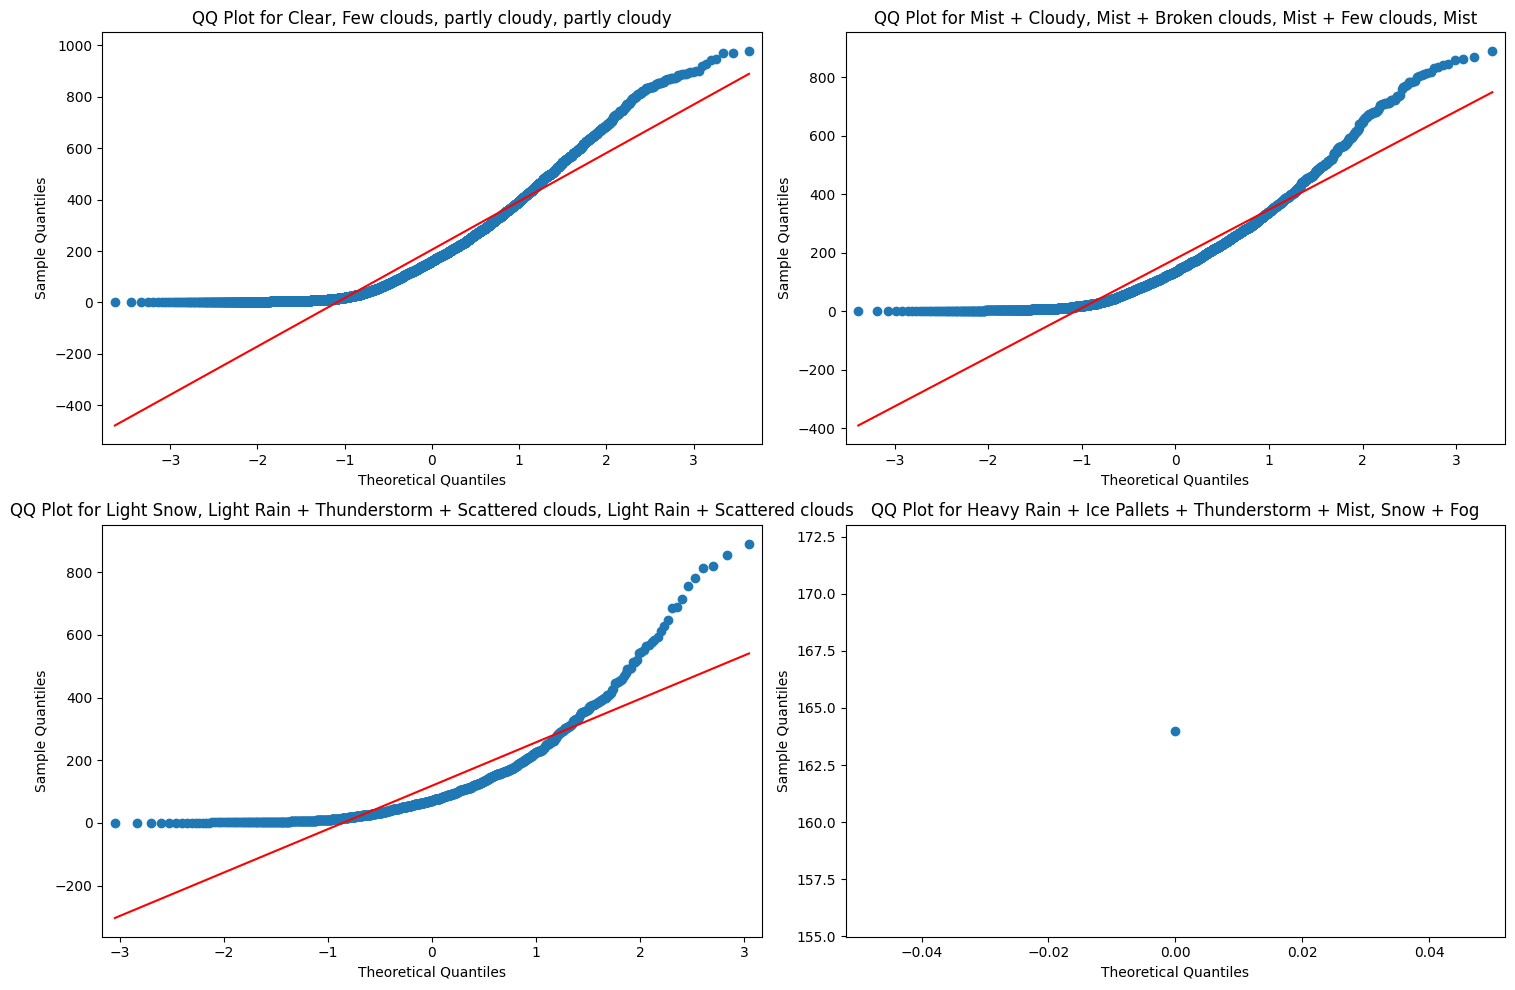

In [ ]:
all_weather_dict = {
    'Clear, Few clouds, partly cloudy, partly cloudy': weather_count_cat1,
    'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist': weather_count_cat2,
    'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds': weather_count_cat3,
    'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog': weather_count_cat4
}
all_weathers = list(all_weather_dict.keys())
num_plots = len(all_weather_dict)
fig, axes = plt.subplots(int(num_plots/2),int(num_plots/2), figsize=(15,10))
for idx, (plot, weather) in enumerate(all_weather_dict.items()):
  row = idx//2
  col = idx%2
  qqplot(weather, line='s', ax=axes[row, col])
  axes[row, col].set_title(f'QQ Plot for {plot}')
plt.tight_layout()
plt.show()

<font color='#b55418'>Observation:</font> From the above plots it's clear that the data is not normal

#####<font color='indigo'>Normality test by using Statistical test (Shapiro Wilk Test)</font>

In [ ]:
for weather, data in all_weather_dict.items():
  print(Fore.BLUE + f'{weather} weather')
  try:
    stats, p_value = shapiro(data)
  except ValueError as e:
    print(Fore.RED+f'\tValueError: {e}'+Fore.BLACK)
  else:
    print(Fore.BLACK + f'\tstats: {np.round(stats,4)}')
    print(f'\tp_value: {np.round(p_value,4)}')
    if p_value < 0.05:
      print(f'\tData is not normally distributed')
    else:
      print(f'\tData is normally distributed')
    print(' ')

Clear, Few clouds, partly cloudy, partly cloudy weather
	stats: 0.8909
	p_value: 0.0
	Data is not normally distributed
 
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather
	stats: 0.8768
	p_value: 0.0
	Data is not normally distributed
 
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather
	stats: 0.7674
	p_value: 0.0
	Data is not normally distributed
 
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather
	ValueError: Data must be at least length 3.


#####<font color='indigo'>Variance b/w the groups by Levene's test</font>

In [ ]:
stats, p_value = levene(weather_count_cat1, weather_count_cat2, weather_count_cat3, weather_count_cat4)
print(Fore.BLUE+'Stats of Variance between the different weather conditions:')
print(Fore.BLACK+f'\tstats: {stats}')
print(f'\tp_value: {np.round(p_value,4)}')

if p_value < 0.05:
  print('\tReject H0, Variance between the groups are not same')
else:
  print('\tAccept H0, Variance between the groups are same')

Stats of Variance between the different weather conditions:
	stats: 54.85106195954556
	p_value: 0.0
	Reject H0, Variance between the groups are not same


<font color='#b55418'>Observation:</font> Assumptions of Anova i.e Normality test and variance test got failed, We can further test by using the Kruskal wallis test for checking whether there is impact of different weather conditions on the yulu bike commuters

In [ ]:
kruskal_stats, p_value = kruskal(weather_count_cat1, weather_count_cat2, weather_count_cat3, weather_count_cat4)
print(Fore.BLUE+'Stats of Kruskal Wallis test:')
print(Fore.BLACK+f'\tstats: {kruskal_stats}')
print(f'\tp_value: {np.round(p_value,4)}')
if p_value < 0.05:
  print('\tReject Ha, There is significant impact of weather on the yulu bike commuters')
else:
  print('\tAccept H0, There is no impact of weather on the yulu bike commuters')

Stats of Kruskal Wallis test:
	stats: 205.00216514479087
	p_value: 0.0
	Reject Ha, There is significant impact of weather on the yulu bike commuters


<font></font>

##<font color='brown'>'temp' Vs 'count' features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: temp and Count are not correlated.
*   Ha: temp and Count are correlated.

In [ ]:
df['temp'].nunique()

49

In [ ]:
temp_count_df = df[['temp','count']]
temp_count_df.head(2)

,temp,count
0,9.84,16
1,9.02,40


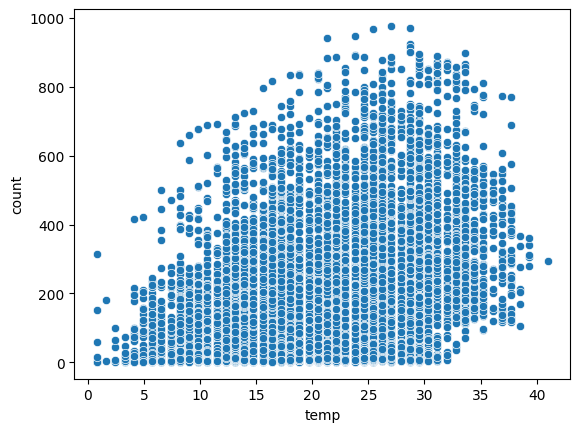

In [ ]:
sns.scatterplot(x=temp_count_df['temp'], y=temp_count_df['count'])
plt.show()

In [ ]:
temp_count_df[['temp','count']].corr(method='pearson')

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


In [ ]:
spearmanr(temp_count_df['temp'], temp_count_df['count'])


SignificanceResult(statistic=0.40798939475098117, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very less correctation betweeen the temp and count of the communters with the correlation value of 0.4079

<font></font>

##<font color='brown'>'atemp' Vs 'count' Features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: atemp and Count are not correlated.
*   Ha: atemp and Count are correlated.

In [ ]:
df['atemp'].nunique()

60

In [ ]:
atemp_count_corr_df = df[['atemp','count']]
atemp_count_corr_df.corr(method='pearson')

,atemp,count
atemp,1.000000,0.389784
count,0.389784,1.000000


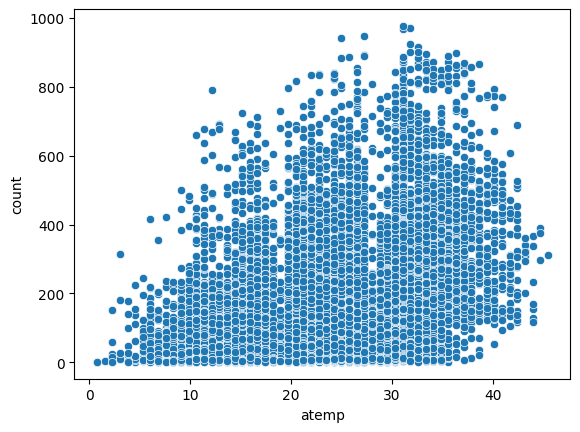

In [ ]:
sns.scatterplot(x=atemp_count_corr_df['atemp'], y=atemp_count_corr_df['count'])
plt.show()

In [ ]:
spearmanr(atemp_count_corr_df['atemp'], atemp_count_corr_df['count'])

SignificanceResult(statistic=0.4065617539204584, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very less correlation betweeen the atemp and count of the communters with the correlation value of 0.4065

<font></font>

##<font color='brown'>humidity Vs count Features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Humidity and Count are not correlated.
*   Ha: Humidity and Count are correlated.



In [ ]:
df['humidity'].nunique()

89

In [ ]:
humidity_count_corr_df = df[['humidity','count']]
humidity_count_corr_df.corr(method='pearson')

,humidity,count
humidity,1.000000,-0.317371
count,-0.317371,1.000000


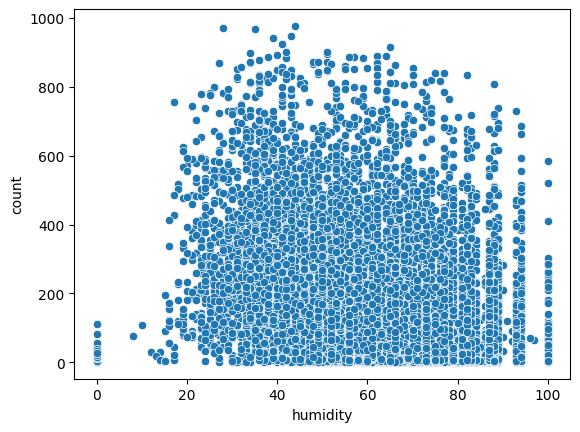

In [ ]:
sns.scatterplot(x=humidity_count_corr_df['humidity'], y=humidity_count_corr_df['count'])
plt.show()

In [ ]:
spearmanr(humidity_count_corr_df['humidity'], humidity_count_corr_df['count'])

SignificanceResult(statistic=-0.35404912201756106, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very less correlation betweeen the humidity and count of the communters with the correlation value of -0.3540

<font></font>

##<font color='brown'>'windspeed'	Vs 'count' Features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Windspeed and Count are not correlated.
*   Ha: Windspeed and Count are correlated.

In [ ]:
df['windspeed'].nunique()

28

In [ ]:
windspeed_count_df = df[['windspeed','count']]
windspeed_count_df.head(2)

,windspeed,count
0,0.0,16
1,0.0,40


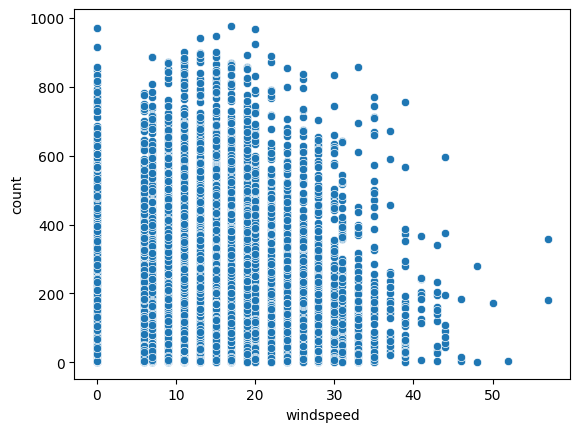

In [ ]:
sns.scatterplot(x=windspeed_count_df['windspeed'], y=windspeed_count_df['count'])
plt.show()

In [ ]:
windspeed_count_corr = windspeed_count_df.corr(method='pearson')
windspeed_count_corr

,windspeed,count
windspeed,1.000000,0.101369
count,0.101369,1.000000


In [ ]:
spearmanr(windspeed_count_df['windspeed'], windspeed_count_df['count'])

SignificanceResult(statistic=0.1357773747113304, pvalue=5.9015220272171205e-46)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very less correlation betweeen the windspeed and count of the communters with the correlation value of 0.135

<font></font>

##<font color='brown'>'casual'	Vs 'count' Features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Casual Cummuters and Count are not correlated.
*   Ha: Casual Cummuters and Count are correlated.

In [ ]:
df['casual'].nunique()

309

In [ ]:
casual_count_df = df[['casual','count']]
casual_count_df.head(2)

,casual,count
0,3,16
1,8,40


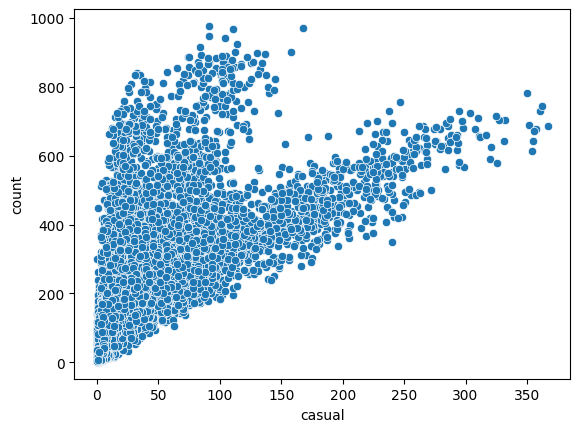

In [ ]:
sns.scatterplot(x=casual_count_df['casual'], y=casual_count_df['count'])
plt.show()

In [ ]:
casual_count_corr = casual_count_df.corr(method='pearson')
casual_count_corr

,casual,count
casual,1.000000,0.690414
count,0.690414,1.000000


In [ ]:
spearmanr(casual_count_df['casual'], casual_count_df['count'])

SignificanceResult(statistic=0.8473776754290643, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very strong correlation betweeen the casual and count features with correlation value of 0.847

<font></font>

##<font color='brown'>'Registered'	Vs 'count' Features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Registered Cummuters and Count are not correlated.
*   Ha: Registered Cummuters are correlated.

In [ ]:
df['registered'].nunique()

731

In [ ]:
registered_count_df = df[['registered','count']]
registered_count_df.head(2)

,registered,count
0,13,16
1,32,40


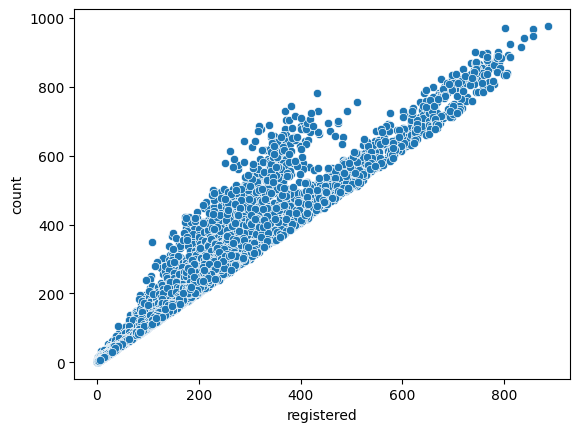

In [ ]:
sns.scatterplot(x=registered_count_df['registered'], y=registered_count_df['count'])
plt.show()

In [ ]:
registered_count_corr = registered_count_df.corr(method='pearson')
registered_count_corr

,registered,count
registered,1.000000,0.970948
count,0.970948,1.000000


In [ ]:
spearmanr(registered_count_df['registered'], registered_count_df['count'])

SignificanceResult(statistic=0.9889007735401409, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Hypothesis Testing we can conclude that there is very strong correlation betweeen the registered and count features with correlation value of 0.988. From this we can say that most of the yulu commuters are registered

<font></font>

##<font color='brown'>'Season'	Vs 'Weather' Features Hypothesis Testing (Chi-Square Test for Independence)</font>
Test Assumptions:
*   H0: Season and Weather are independent of each other.
*   Ha: Season and Weather are dependent on each other.



In [ ]:
season_weather_df = df[['season','weather']]

In [ ]:
season_weather_cross_tab = pd.crosstab(season_weather_df['season'], season_weather_df['weather'])

In [ ]:
stats, p_value, dof, exp_freq = chi2_contingency(season_weather_cross_tab)

In [ ]:
chi2_ind_stats = {'Chi_Stats':stats, 'P-value':p_value, 'DOF':dof, 'Expected_Values':exp_freq}
for k,v in chi2_ind_stats.items():
  print(Fore.BLUE+f'{k}:'+Fore.BLACK+f' {v}\n')

Chi_Stats: 49.158655596893624

P-value: 1.549925073686492e-07

DOF: 9

Expected_Values: [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]



In [ ]:
if p_value < 0.05:
  print(Fore.BLUE+'Reject H0, Season and Weather are dependent on each other'+Fore.BLACK)
else:
  print(Fore.BLUE+'Accept H0, Season and Weather are independent on each other'+Fore.BLACK)

Reject H0, Season and Weather are dependent on each other


<font color='#b55418'>Observation:</font> From the above Hypothesis Testing we can conclude that Season and Weather are dependent on each other.

<font></font>

##<font color='brown'>Summary/Insights:</font>
###<font color='purple'>    Basic Analysis:</font>


*   Analysis is done base on these features
  *   **'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'timestamp', 'year', 'month' & 'day'**
*   Total there are **10887** rows in the given dataset.
*   **Temperature:** Minimum is **0.82**, median is **20.50** and the maximum is **41.00** from the given dataset
*   **Feeling temperature:** Minimum is **0.76**, median is **24.24** and the maximum is **41.00** from the given dataset
*   **Humidity:** Minimum is **0.00**, median is **62.00** and the maximum is **100.00** from the given dataset
*   **Windspeed**: Minimum is **0.00**, median is **12.99** and the maximum is **56.99** from the given dataset
*   The maximum retal bikes used by the **casual commuters** over the given time is **367.00**
*   The maximum retal bikes used by the **registered commuters** over the given time is **886.00**
*   The maximum retal bikes used by both the **casual and registered commuters** over the given day is **977.00** i.e on **2012-09-12** at **18:00:00**
*   The **count** of the commuters on the day **(2012-07-07 16:00:00)** when the **maximum temperature** experienced was **294**
*   The **count** of the commuters on the day **(2012-07-08 14:00:00)** when the **maximum feeling temperature** experienced was **312**
*   The **count** of the commuters on the day **2011-07-03** when maximum windspeed experience was **539**


###<font color='purple'>    Univariate Analysis:</font>
*   The **total coummters** traveled in **2011** and **2012** are **781979
 (37%)** and **1303497 (63%)** respectively from the given dataset.
*   The given dataset consists of almost equal propotion of different seasos's entries
*   In the given dataset there are **10575 (97.14%)** samples are of **Non-Holidays** and **311 (2.86%)** are of **Holidays**
*   In the given dataset there are **7412 (68.08%)** samples are of **Non-Workingdays** and **3474 (31.91%)** are of **Workingdays**
* In the given dataset, **7192 (66.06%)**, **2834 (26.03%)**, **859 (7.89%)** and **1 (0.01%)** entries are of weather conditons 1,2,3,4 respectively.
*We can observe that the datasamples of **temp, atemp, humidity, windspread are not normally distributed (Not Gaussian)**.
*The commuters travelled during the **Fall, Winter, Summer & Spring** are **640662 (31%), 544034 (26%), 588282 (28%) & 312498 (15%)** respectively





###<font color='purple'>    Bivariate Analysis:</font>
*   Most of the commters are used the yulu rental bikes during the **season 3** with high median value.
*   **very few** of the commters are used the yulu rental bikes during the **season 1** with very less median value.
*   All the **seasons** have the **outliers** but **season 1** has **more outliers**.
*   **Most of the commuters** are travelled during the **weather 1**.
*   **very few of the commuters** are travelled during the **weather 3** codition with very less median value.
*   The median of **Working and Non-Working days are almost same.
*   The median of Holiday and  Non-Holiday are almost same.
*   From the data most of the commuters used the yulu bikes during the **May to June**.
*   Commuters used the rental bikes is **almost equal in proportion in different weekdays**.
*   **Most of the commuters** used the rental bikes at **7:00PM**.
*   **Very Few commuters** used the rental bikes at **4:00AM**.
###<font color='purple'>    Hypothesis Testing Analysis:</font>
*   There is significant impact of seasons on yulu commuters
*   There is no significant difference in the count of commuters during the holidays and non-holidays
*   There is no significant differnce in the count of commuters during the workingday and non-workingday
*   There is significant impact of weather on the yulu bike commuters
*   There is very less correctation betweeen the temp and count of the communters with the correlation value of **0.4079**
*   There is very less correlation betweeen the atemp and count of the communters with the correlation value of **0.4065**
*   There is very less correlation betweeen the humidity and count of the communters with the correlation value of **-0.3540**
*   There is very less correlation betweeen the humidity and count of the communters with the correlation value of **-0.3540**
*   There is very strong correlation betweeen the casual and count features with correlation value of **0.847**
*   There is very strong correlation betweeen the registered and count features with correlation value of **0.988**. From this we can say that most of the yulu commuters are registered
*   Season and Weather are dependent on each other.




